## Access the eReefs data. Plot a 2d-data

In [3]:
# import libraries
import netCDF4
from netCDF4 import Dataset
from netCDF4 import num2date

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from show_area_ext import *

%matplotlib inline

In [5]:
# Define data file to be downloaded

# time
year = 2011
month = 2
netCDF_datestr = str(year)+'-'+format(month, '02')

# file name 
filename_common = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/ereefs/gbr4_v4/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v4_hydro_daily-monthly-"
inputFile = filename_common + netCDF_datestr + '.nc'

In [6]:
# Download the file
nc_data = Dataset(inputFile, 'r')

In [18]:
# List variables contained in the file
print(list(nc_data.variables))

['mean_cur', 'salt', 'temp', 'u', 'v', 'zc', 'time', 'latitude', 'longitude', 'mean_wspeed', 'eta', 'wspeed_u', 'wspeed_v']


In [7]:
# Load coordinate variables

# lat, lon
lat = nc_data['latitude'][:] 
lon = nc_data['longitude'][:]

print('Latitude extend: ', lat.min(), lat.max())
print('Longitude extend:', lon.min(), lon.max())


time_var = nc_data['time']

print('start time: ', num2date(time_var[0], time_var.units))
print('end time: ', num2date(time_var[-1], time_var.units))
print('No. of timesteps :', len(time_var))


Latitude extend:  -28.696022 -7.036022
Longitude extend: 142.168788 156.868788
start time:  2011-01-31 14:00:00
end time:  2011-02-27 14:00:00
No. of timesteps : 28


In [6]:
nc_data['salt']

<class 'netCDF4._netCDF4.Variable'>
float32 salt(time, k, latitude, longitude)
    puv__parameter: http://vocab.nerc.ac.uk/collection/P01/current/PSLTMP01/
    puv__uom: http://qudt.org/vocab/unit/PSU
    coordinates: time zc latitude longitude
    short_name: salt
    aggregation: Daily
    units: PSU
    long_name: Salinity
    _ChunkSizes: [  1   1 133 491]
unlimited dimensions: time
current shape = (28, 17, 723, 491)
filling off

In [20]:
# Set lon lat extent
lon_min = 145.5
lon_max = 147

lat_min = -19
lat_max = -17

lon_lat_ext = [lon_min, lon_max, lat_min, lat_max]

# Form 2d grid of lon lat coordimates
lon_2D, lat_2D = np.meshgrid(lon, lat)

# Find index of min and max lat and lon
lon_min_idx = np.searchsorted(lon, lon_min)
lon_max_idx = np.searchsorted(lon, lon_max)
lat_min_idx = np.searchsorted(lat, lat_min)
lat_max_idx = np.searchsorted(lat, lat_max)

lon_idx_ext = np.arange(lon_min_idx, lon_max_idx)
lat_idx_ext = np.arange(lat_min_idx, lat_max_idx)

print(lon[[lon_min_idx, lon_max_idx]])
print(lat[[lat_min_idx, lat_max_idx]])

[145.528788 147.028788]
[-18.976022 -16.996022]


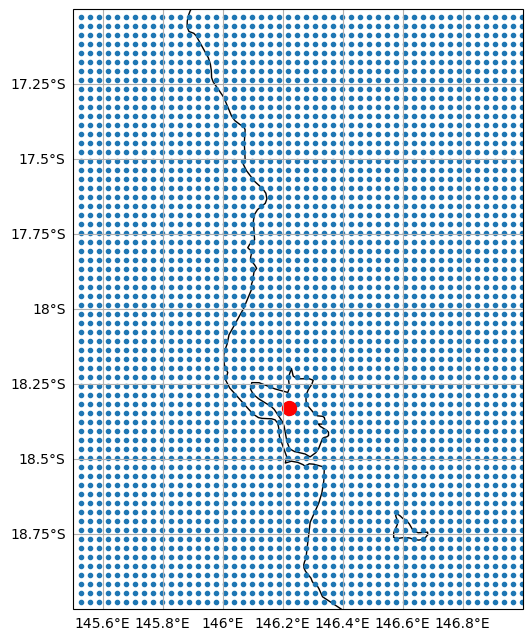

In [21]:
# Plot area we are studying, and available data points

# Define figure and axis
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.gridlines(draw_labels=['bottom', 'left'])

# Plot grid points within range of study

ax.plot([lon[i] for i in lon_idx_ext for j in lat_idx_ext], [lat[j] for i in lon_idx_ext for j in lat_idx_ext], '.')

# Label the location of study site
ax.plot([146.22], [-18.33], 'ro', markersize=10)
#ax.text(146.22+0.1, -18.33+0.1, 'Hutchinson Island')



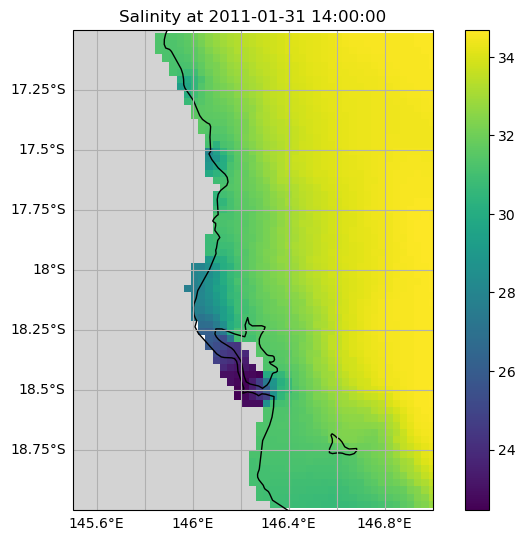

In [22]:
# Plot 2d data of salinity

# Define time index
time_idx = 0

# Define data to be plotted
var_name = 'salt'

# Extract data of the variable
if nc_data[var_name].ndim==4:
    var_values = nc_data[var_name][time_idx, -1, lat_idx_ext, lon_idx_ext] #  4d data, take top-most layer
else:
    var_values = nc_data[var_name][time_idx, lat_idx_ext, lon_idx_ext]    #  3d data

# Plot the 2D data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1], projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon[lon_idx_ext], lat[lat_idx_ext], var_values, 
                    vmin = np.nanmin(var_values), vmax = np.nanmax(var_values), 
                    transform=ccrs.PlateCarree(), shading='auto')
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.gridlines(draw_labels=['bottom', 'left'])
ax.set_extent(lon_lat_ext)
dtime = num2date(nc_data['time'][time_idx], nc_data['time'].units)
time_str = dtime.strftime('%Y-%m-%d %H:%M:%S')
ax.set_title(nc_data[var_name].long_name + ' at ' + time_str)
fig.colorbar(p)

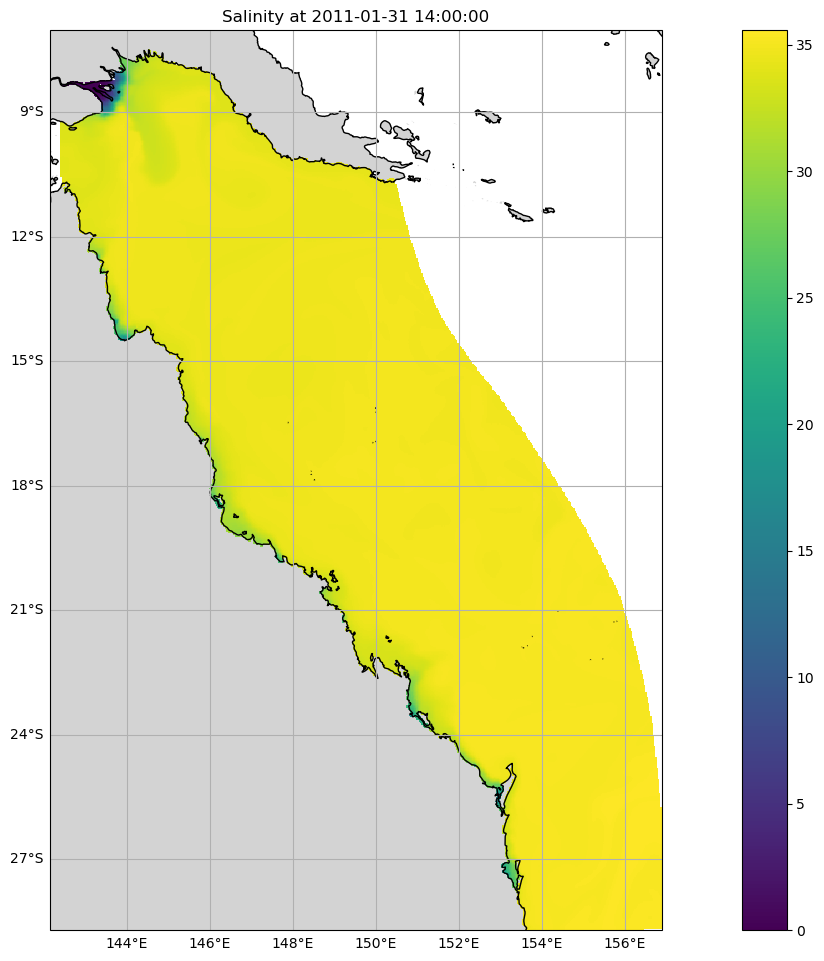

In [31]:
# Plot corresponding global data

# Define time index
time_idx = 0

# Define data to be plotted
var_name = 'salt'

# Extract data of the variable
if nc_data[var_name].ndim==4:
    var_values = np.array(nc_data[var_name][time_idx, -1, :, :]) #  4d data, take top-most layer
else:
    var_values = np.array(nc_data[var_name][time_idx, :, :])    #  3d data

# Plot the 2D data
fig = plt.figure(figsize=(16,9))
ax = fig.add_axes([0,0,1,1], projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon, lat, var_values, 
                    vmin = np.nanmin(var_values), vmax = np.nanmax(var_values), 
                    transform=ccrs.PlateCarree(), shading='auto')
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.gridlines(draw_labels=['bottom', 'left'])
#ax.set_extent(lon_lat_ext)
dtime = num2date(nc_data['time'][time_idx], nc_data['time'].units)
time_str = dtime.strftime('%Y-%m-%d %H:%M:%S')
ax.set_title(nc_data[var_name].long_name + ' at ' + time_str)
fig.colorbar(p)

In [32]:
var_values

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ..., 35.30817 , 35.308197,
        35.30825 ],
       [      nan,       nan,       nan, ..., 35.307823, 35.308193,
        35.307777],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [34]:
#np.min(var_values)

nan

In [18]:
#help(ax.gridlines)

Help on method gridlines in module cartopy.mpl.geoaxes:

gridlines(
    crs=None,
    draw_labels=False,
    xlocs=None,
    ylocs=None,
    dms=False,
    x_inline=None,
    y_inline=None,
    auto_inline=True,
    xformatter=None,
    yformatter=None,
    xlim=None,
    ylim=None,
    rotate_labels=None,
    xlabel_style=None,
    ylabel_style=None,
    labels_bbox_style=None,
    xpadding=5,
    ypadding=5,
    offset_angle=25,
    auto_update=None,
    formatter_kwargs=None,
    **kwargs
) method of cartopy.mpl.geoaxes.GeoAxes instance
    Automatically add gridlines to the axes, in the given coordinate
    system, at draw time.

    Parameters
    ----------
    crs: optional
        The :class:`cartopy._crs.CRS` defining the coordinate system in
        which gridlines are drawn.
        Defaults to :class:`cartopy.crs.PlateCarree`.
    draw_labels: optional
        Toggle whether to draw labels. For finer control, attributes of
        :class:`Gridliner` may be modified individu

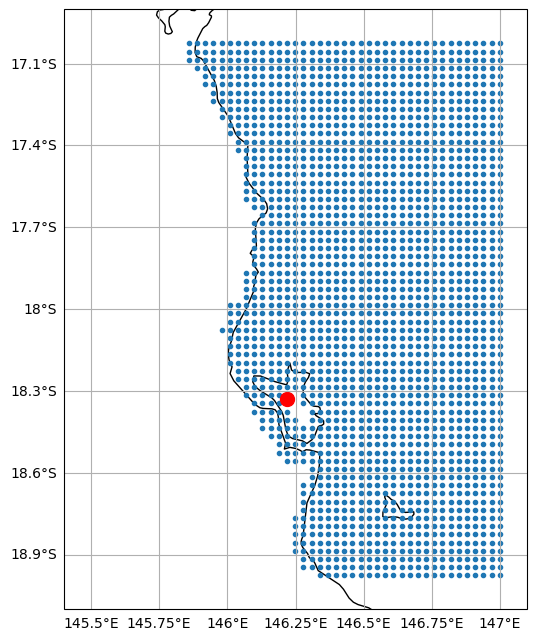

In [35]:
# Plot points at which data is not nan

# Find grid points where data is not nan
grid_pts = []
for i in lon_idx_ext:
    for j in lat_idx_ext:
        if not np.isnan(var_values[j][i]):
            grid_pts.append([lon[i], lat[j]])

grid_pts = np.array(grid_pts)

# Define figure and axis
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
ax.set_extent([lon_min-0.1, lon_max+0.1, lat_min-0.1, lat_max+0.1])
ax.gridlines(draw_labels=['bottom', 'left'])
ax.coastlines()

# Plot points where data are available
ax.plot(grid_pts[:,0], grid_pts[:,1],'.')

# Label the location of study site
ax.plot([146.22], [-18.33], 'ro', markersize=10)
#ax.text(146.22+0.1, -18.33+0.1, 'Hutchinson Island')



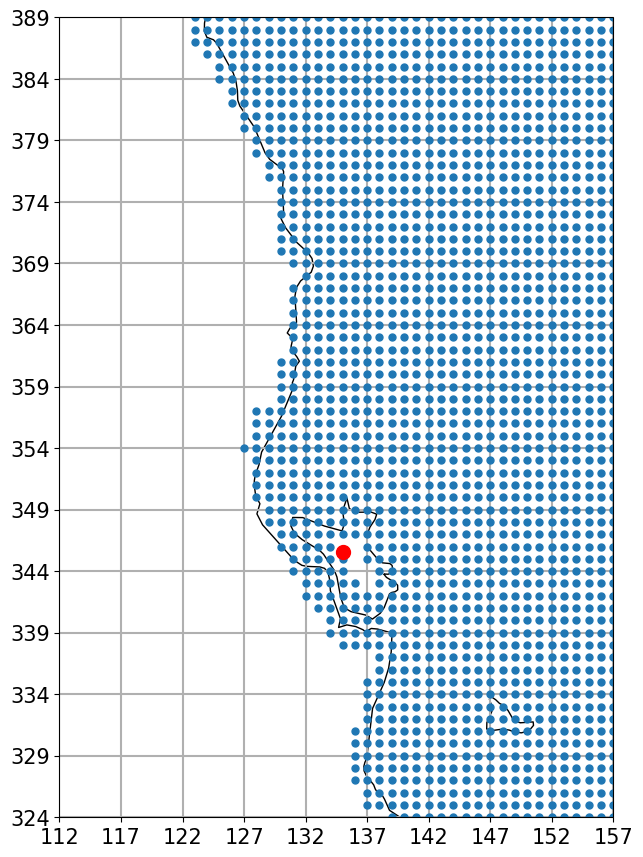

In [36]:
# Plot area we are studying, and available data points, label by indices of data points

# Find grid points where data is not nan
grid_pts = []
for i in lon_idx_ext:
    for j in lat_idx_ext:
        if not np.isnan(var_values[j][i]):
            grid_pts.append([lon[i], lat[j]])

grid_pts = np.array(grid_pts)

# Define figure and axis
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
ax.set_extent([146.22-0.2, 146.22+0.2, -18.33-0.2, -18.33+0.2])
ax.set_xticks(lon[lon_idx_ext[::5]])
ax.set_xticklabels(lon_idx_ext[::5], fontsize=15)
ax.set_yticks(lat[lat_idx_ext[::5]])
ax.set_yticklabels(lat_idx_ext[::5], fontsize=15)
ax.grid(linewidth=1.5)
ax.coastlines()

# Plot points where data are available
ax.plot(grid_pts[:,0], grid_pts[:,1],'o', markersize=5)

# Label the location of study site
ax.plot([146.22], [-18.33], 'ro', markersize=10)
#ax.text(146.22+0.1, -18.33+0.1, 'Hutchinson Island')


In [8]:
# Define study sites and their lon and lat indices within the dataset
sites_name = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
sites_lon_idx = [130, 133, 136, 139, 140, 138, 137, 134]
sites_lat_idx = [348, 345, 340, 341, 344, 346, 350, 349]

In [10]:
# Store study sites information in a pandas DataFrame, then into a csv

# list to collect site information
sites_info = []

# iteratively append site information
for i in range(len(sites_name)):
    site_name = sites_name[i]
    lon_idx = sites_lon_idx[i]
    lat_idx = sites_lat_idx[i]
    site_info = {'site_name': site_name,
                'lon': lon[lon_idx],
                'lat': lat[lat_idx],
                'lon_idx': lon_idx,
                'lat_idx': lat_idx}
    
    sites_info.append(site_info)

# form DataFrame
df_sites = pd.DataFrame(sites_info, columns = ['site_name', 'lon', 'lat', 'lon_idx', 'lat_idx'])
df_sites
#df_sites.dtypes

,site_name,lon,lat,lon_idx,lat_idx
0,A,146.068788,-18.256022,130,348
1,B,146.158788,-18.346022,133,345
2,C,146.248788,-18.496022,136,340
3,D,146.338788,-18.466022,139,341
4,E,146.368788,-18.376022,140,344
5,F,146.308788,-18.316022,138,346
6,G,146.278788,-18.196022,137,350
7,H,146.188788,-18.226022,134,349


In [11]:
# store site informations in a .csv file
#df_sites.to_csv('sites.csv', index=False)

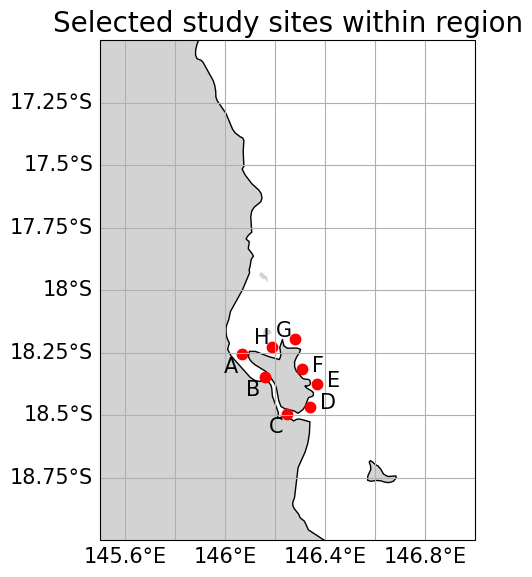

In [62]:
# Plot the selected site locations within study region
fig, ax = show_area_ext(lon_lat_ext, figsize=(10, 5))
for i in range(len(sites_name)):
    lon_site = lon[sites_lon_idx[i]]
    lat_site = lat[sites_lat_idx[i]]
    ax.plot(lon_site, lat_site, 'ro', markersize=7.5)


for i in range(0,3):
    ax.text(lon[sites_lon_idx[i]]-0.075, lat[sites_lat_idx[i]]-0.075, sites_name[i], fontsize=15)

for i in range(3,6):
    ax.text(lon[sites_lon_idx[i]]+0.04, lat[sites_lat_idx[i]]-0.01, sites_name[i], fontsize=15)

for i in range(6, len(sites_name)):
    ax.text(lon[sites_lon_idx[i]]-0.075, lat[sites_lat_idx[i]]+0.01, sites_name[i], fontsize=15)

ax.set_title('Selected study sites within region', fontsize=20)

# save image to file
plt.show()
fig.savefig('sites.png')

In [33]:
help(fig.savefig)

Help on method savefig in module matplotlib.figure:

savefig(fname, *, transparent=None, **kwargs) method of matplotlib.figure.Figure instance
    Save the current figure as an image or vector graphic to a file.

    Call signature::

      savefig(fname, *, transparent=None, dpi='figure', format=None,
              metadata=None, bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto', backend=None,
              **kwargs
             )

    The available output formats depend on the backend being used.

    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.

        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
      

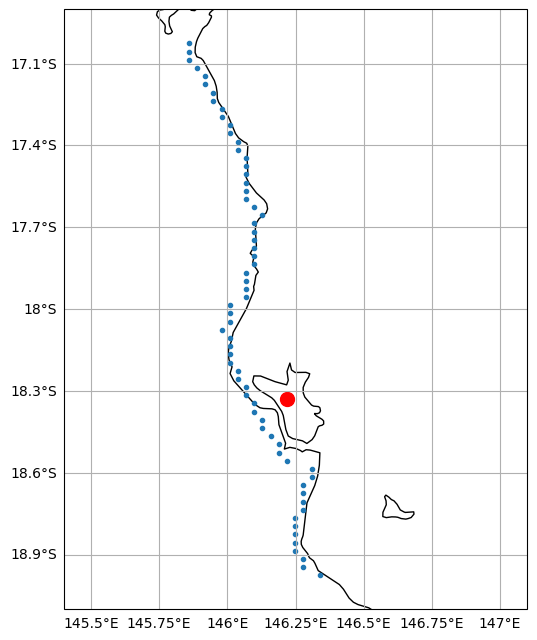

In [63]:
# Find locations closest to coastline at which data is recorded (i.e. not nan)

# Find grid points along coastline
grid_pts_coast = []
for i in lat_idx_ext:
    for j in lon_idx_ext:
        if not np.isnan(var_values[i][j]):
            grid_pts_coast.append([lon[j], lat[i]])
            break
grid_pts_coast = np.array(grid_pts_coast)

# Plot the grid points
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
ax.set_extent([lon_min-0.1, lon_max+0.1, lat_min-0.1, lat_max+0.1])
ax.coastlines()
ax.gridlines(draw_labels=['bottom', 'left'])

# Label the location of study site
ax.plot([146.22], [-18.33], 'ro', markersize=10)
#ax.text(146.22+0.1, -18.33+0.1, 'Hutchinson Island'

# Plot grid points along coastline
ax.plot(grid_pts_coast[:,0], grid_pts_coast[:,1],'.')

# Save figure
#fig.savefig('grid_pts_coast_' + var_name + '.png')